# Lab 10 MNIST and Softmax

## Lab10-5-mnist_nn_dropout
### - activation fn : ReLU
### - weight initializer : Xavier
### - Accuracy = 0.9812 (dropout을 해서 조금 더 좋아짐)

In [1]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

In [2]:
tf.set_random_seed(777)  # reproducibility

In [3]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
# parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

In [5]:
# input place holders
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

In [6]:
# train시킬 때 몇퍼센트의 node들만 포함시켜서 할 지 정하는 값
# 나중에 test할 때는 반드시 1로 해주고 해야함!!!
# dropout (keep_prob) rate  0.7 on training, but should be 1 for testing
keep_prob = tf.placeholder(tf.float32)

In [7]:
# weights & bias for nn layers
# http://stackoverflow.com/questions/33640581/how-to-do-xavier-initialization-on-tensorflow
W1 = tf.get_variable("W1", shape=[784, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([512]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)
L1 = tf.nn.dropout(L1, keep_prob=keep_prob)

In [8]:
W2 = tf.get_variable("W2", shape=[512, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([512]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)
L2 = tf.nn.dropout(L2, keep_prob=keep_prob)

In [9]:
W3 = tf.get_variable("W3", shape=[512, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([512]))
L3 = tf.nn.relu(tf.matmul(L2, W3) + b3)
L3 = tf.nn.dropout(L3, keep_prob=keep_prob)

In [10]:
W4 = tf.get_variable("W4", shape=[512, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([512]))
L4 = tf.nn.relu(tf.matmul(L3, W4) + b4)
L4 = tf.nn.dropout(L4, keep_prob=keep_prob)

In [11]:
W5 = tf.get_variable("W5", shape=[512, 10],
                     initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L4, W5) + b5

In [12]:
# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



In [13]:
# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [14]:
# train my model
for epoch in range(training_epochs):
    avg_cost = 0

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys, keep_prob: 0.7}  # keep_prob:0.7 => 70%만을 이용해서 train하겠다!!
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

Epoch: 0001 cost = 0.451240691
Epoch: 0002 cost = 0.174481454
Epoch: 0003 cost = 0.128587236
Epoch: 0004 cost = 0.109119285
Epoch: 0005 cost = 0.092670795
Epoch: 0006 cost = 0.082088990
Epoch: 0007 cost = 0.077748027
Epoch: 0008 cost = 0.070568659
Epoch: 0009 cost = 0.063686291
Epoch: 0010 cost = 0.057611010
Epoch: 0011 cost = 0.062052387
Epoch: 0012 cost = 0.052562773
Epoch: 0013 cost = 0.051294356
Epoch: 0014 cost = 0.046317724
Epoch: 0015 cost = 0.047256546
Learning Finished!


In [15]:
# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels, keep_prob: 1}))   # test할 때에는 모든 node를 이용!!!

Accuracy: 0.9812


In [16]:
# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1], keep_prob: 1}))

Label:  [2]
Prediction:  [2]


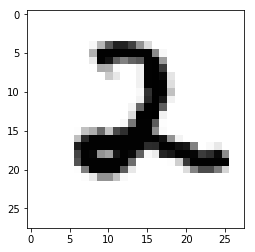

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


ValueError: Variable W1 already exists, disallowed. Did you mean to set reuse=True or reuse=tf.AUTO_REUSE in VarScope? Originally defined at:

  File "C:\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 1717, in __init__
    self._traceback = tf_stack.extract_stack()
  File "C:\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 3155, in create_op
    op_def=op_def)
  File "C:\Anaconda3\lib\site-packages\tensorflow\python\util\deprecation.py", line 454, in new_func
    return func(*args, **kwargs)


In [17]:
plt.imshow(mnist.test.images[r:r + 1].
          reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()

'''
Epoch: 0001 cost = 0.447322626
Epoch: 0002 cost = 0.157285590
Epoch: 0003 cost = 0.121884535
Epoch: 0004 cost = 0.098128681
Epoch: 0005 cost = 0.082901778
Epoch: 0006 cost = 0.075337573
Epoch: 0007 cost = 0.069752543
Epoch: 0008 cost = 0.060884363
Epoch: 0009 cost = 0.055276413
Epoch: 0010 cost = 0.054631256
Epoch: 0011 cost = 0.049675195
Epoch: 0012 cost = 0.049125314
Epoch: 0013 cost = 0.047231930
Epoch: 0014 cost = 0.041290121
Epoch: 0015 cost = 0.043621063
Learning Finished!
Accuracy: 0.9804
'''

# Accuracy = 0.9812     # dropout을 해서 조금 더 좋아짐
import tensorflow as tf
import random
# import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

tf.set_random_seed(777)  # reproducibility

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset

# parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

# input place holders
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

# train시킬 때 몇퍼센트의 node들만 포함시켜서 할 지 정하는 값
# 나중에 test할 때는 반드시 1로 해주고 해야함!!!
# dropout (keep_prob) rate  0.7 on training, but should be 1 for testing
keep_prob = tf.placeholder(tf.float32)

# weights & bias for nn layers
# http://stackoverflow.com/questions/33640581/how-to-do-xavier-initialization-on-tensorflow
W1 = tf.get_variable("W1", shape=[784, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([512]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)
L1 = tf.nn.dropout(L1, keep_prob=keep_prob)

W2 = tf.get_variable("W2", shape=[512, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([512]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)
L2 = tf.nn.dropout(L2, keep_prob=keep_prob)

W3 = tf.get_variable("W3", shape=[512, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([512]))
L3 = tf.nn.relu(tf.matmul(L2, W3) + b3)
L3 = tf.nn.dropout(L3, keep_prob=keep_prob)

W4 = tf.get_variable("W4", shape=[512, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([512]))
L4 = tf.nn.relu(tf.matmul(L3, W4) + b4)
L4 = tf.nn.dropout(L4, keep_prob=keep_prob)

W5 = tf.get_variable("W5", shape=[512, 10],
                     initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L4, W5) + b5

# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# train my model
for epoch in range(training_epochs):
    avg_cost = 0

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys, keep_prob: 0.7}  # keep_prob:0.7 => 70%만을 이용해서 train하겠다!!
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels, keep_prob: 1}))   # test할 때에는 모든 node를 이용!!!

# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1], keep_prob: 1}))

# plt.imshow(mnist.test.images[r:r + 1].
#           reshape(28, 28), cmap='Greys', interpolation='nearest')
# plt.show()

'''
Epoch: 0001 cost = 0.447322626
Epoch: 0002 cost = 0.157285590
Epoch: 0003 cost = 0.121884535
Epoch: 0004 cost = 0.098128681
Epoch: 0005 cost = 0.082901778
Epoch: 0006 cost = 0.075337573
Epoch: 0007 cost = 0.069752543
Epoch: 0008 cost = 0.060884363
Epoch: 0009 cost = 0.055276413
Epoch: 0010 cost = 0.054631256
Epoch: 0011 cost = 0.049675195
Epoch: 0012 cost = 0.049125314
Epoch: 0013 cost = 0.047231930
Epoch: 0014 cost = 0.041290121
Epoch: 0015 cost = 0.043621063
Learning Finished!
Accuracy: 0.9804
'''
